## 4.1.2 多维数组的运算 
### 1. 基本算术运算
&emsp;&emsp;Python支持的常见算术运算，如：“+”，“-”，“*”，“/”，“**”等都可以对NumPy的ndarray对象实现整体运算。
#### （1）多维数组与标量运算
&emsp;&emsp;多维数组运算规则是，同维数组相应位置的两个元素执行运算。不同维的数组运算时，Python使用“广播机制”来处理。单个标量会扩展为与原来数组一样的形状，再逐一运算。

&emsp;&emsp;**例4-1-16** 将scores数组中的成绩都加2分。

In [1]:
import numpy as np

In [2]:
scores=np.array([[96,73,78],[90,89,92],[60,70,83]])

In [3]:
scores

array([[96, 73, 78],
       [90, 89, 92],
       [60, 70, 83]])

In [4]:
________________ #将scores数组中的成绩都加2分

In [5]:
scores

array([[98, 75, 80],
       [92, 91, 94],
       [62, 72, 85]])

#### （2）二维数组与一维数组的运算
&emsp;&emsp;二维数组与一维数组运算时，两个数组的列数要一致，一维数组将扩展行数，再逐一计算。

&emsp;&emsp;**例4-1-17** 创建二维数组对象a和一维数组对象b，相加后赋值给c。

In [6]:
______________ #创建2行5列的全1二维数组a

In [7]:
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [8]:
_____________ #创建数值为1到5的一维数组

In [9]:
b

array([1, 2, 3, 4, 5])

In [10]:
_____________ #a的各元素与b的各元素相加后赋给c

In [11]:
c

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

### 2. 函数运算
#### （1）通用函数
&emsp;&emsp;NumPy中常用的数学函数如表4-1-3所示。
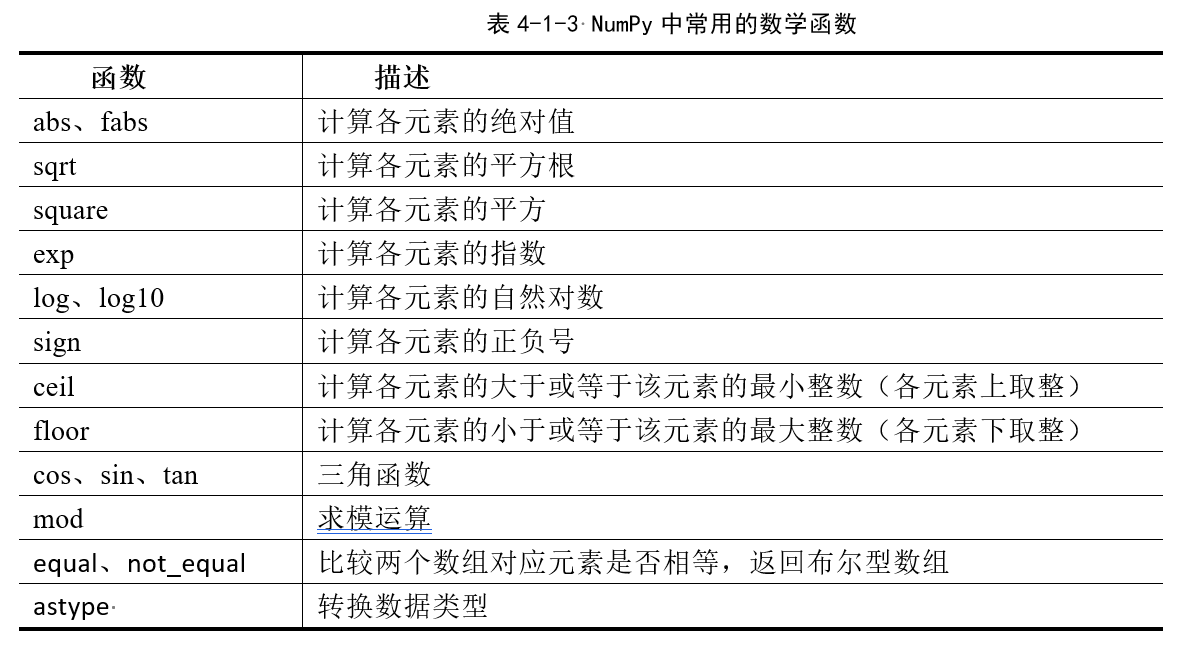
&emsp;&emsp;上述函数中，除了astype()函数的使用方法为“对象名.astype('数据类型')”外，其余函数的使用方法都是“numpy.函数名(参数)”。 

&emsp;&emsp;**例4-1-18** 将浮点数类型的一维数组转换为整数类型的一维数组。

In [12]:
arr1 = np.array([1.1, 2.8, 3.3, 4.4, 5.3221])

In [13]:
arr2= arr1._________('int32') #将arr1中的元素类型转换为int32

In [14]:
arr2

array([1, 2, 3, 4, 5])

#### （2）聚集函数
&emsp;&emsp;NumPy中常用的统计函数如表4-1-5所示。
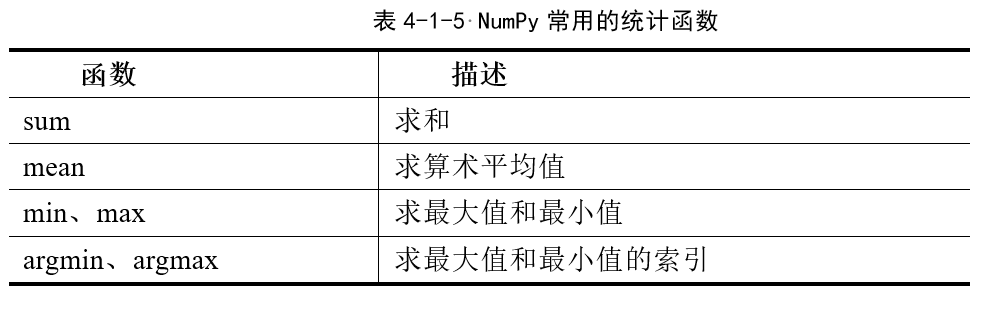
&emsp;&emsp;NumPy的统计函数的统计含义与内置模块或其他数值计算模块的同名函数相同，不同之处在于增加了axis参数设置轴，统计则沿着轴方向分组进行统计。如果不设置axis参数，对所有数组元素统计。

&emsp;&emsp;在NumPy中，维度(ndim)是由轴(axis)构成的，如图4-1-3所示。一维数组只有一个维度，只有一个水平轴，axis的值只有一个，默认为0。二维数组的维度为2，有行列两个轴，行方向的轴axis=1，列方向的轴axis=0。如果求每行的最大值则是在行方向上求最大值，axis的值为1。如果求每列的最大值，则是在方向上求最大值，axis的值为0。
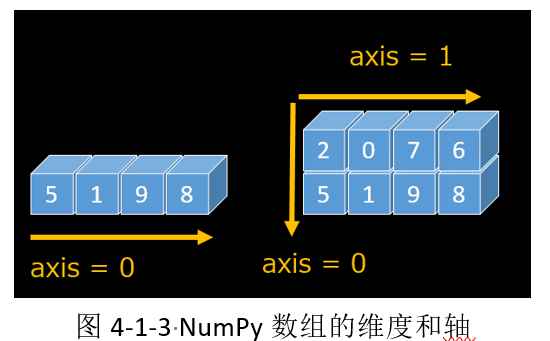
&emsp;&emsp;**例4-1-19** 求二维数组arr1的最大值、最大值的序号和每行的最大值。

In [15]:
arr1=np.random.randint(1,100,(3,4))

In [16]:
arr1

array([[48, 21,  6, 26],
       [32, 30, 46, 51],
       [55, 35, 47, 37]])

In [17]:
______________     #数组的最大值

55

In [18]:
______________    #数组的最大值的序号

8

In [19]:
______________    #每行的最大值

array([48, 51, 55])

In [20]:
______________    #每列的最大值

array([55, 35, 47, 51])

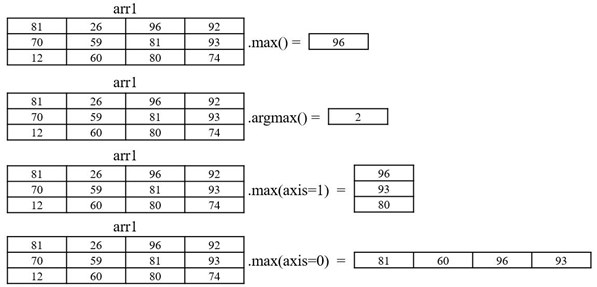

### 3. NumPy的综合运用
&emsp;&emsp;**例4-1-20** 创建一个存储了9个城市的12个月降雨量的NumPy对象rain，降雨量的值由NumPy的随机函数randint()产生，降雨量的范围为0~300毫米。求每个城市的平均降水量和每个城市最大降水量出现的月份。

&emsp;&emsp;程序实现代码如下：

#### （1）NumPy对象rain的创建
&emsp;&emsp;np.random.randint(start,end,size)可以生成取值范围为从start到end-1的数组元素，size是一个整数或一个整组元组，给出数组的形状。通过调用randint()函数完成对rain的创建，生成一个9行12列的数组，表示9个城市，12个月的降雨量。
程序运行结果如下所示：

In [21]:
rain=np.random.randint(0,301,(9,12))
print(rain)

[[239 250 176 240 114 292 172 117  61 291  89 237]
 [293  77  21 255 269 147 155 238 165 205 165  80]
 [126 110  68 264 251  72 225  61  80 279 199 150]
 [149 131 251  17 218 179  45 271 237 214 281 257]
 [ 23   9 244  61  94  72  88 175  18 230  55 174]
 [126 267 145  21  67 233 171  51 175 152  66 184]
 [ 96 251 261 199 131 173  79 139 234 230 284   8]
 [132   7   3  70 224   9 170  18 111 139 244 166]
 [266  65 288 183 188 285 242  56 201 146  95 122]]


#### （2）每个城市平均降水量的计算
&emsp;&emsp;使用np.mean()函数，并设置按行方向计算每个城市的降雨量的平均值，同时使用了np.around()函数设置输出精度为浮点数小数点后保留一位小数。 

In [22]:
print(np.around(rain.mean(axis=__________),decimals=1))  #

[189.8 172.5 157.1 187.5 103.6 138.2 173.8 107.8 178.1]


#### （3）每个城市最大降水量月份的计算
&emsp;&emsp;使用np.argmax()函数取得最大值对应的索引值，由于索引值从0开始，而月份从一月记录，所以做了加1操作。

In [23]:
print(rain.argmax(axis=__________)+1)  #

[ 6  1 10 11  3  2 11 11  3]
